Kolom yang ditemukan dalam file: Index(['NO', 'KODE', 'TANGGAL', 'NOMOR DAN TANGGAL', 'SIFAT SURAT',
       'ISI RINGKAS', 'DARI', 'KEPADA', 'PENGOLAH', 'KET'],
      dtype='object')
Kolom 'Jumlah_Surat' tidak ditemukan. Membuat kolom baru dengan nilai dummy...


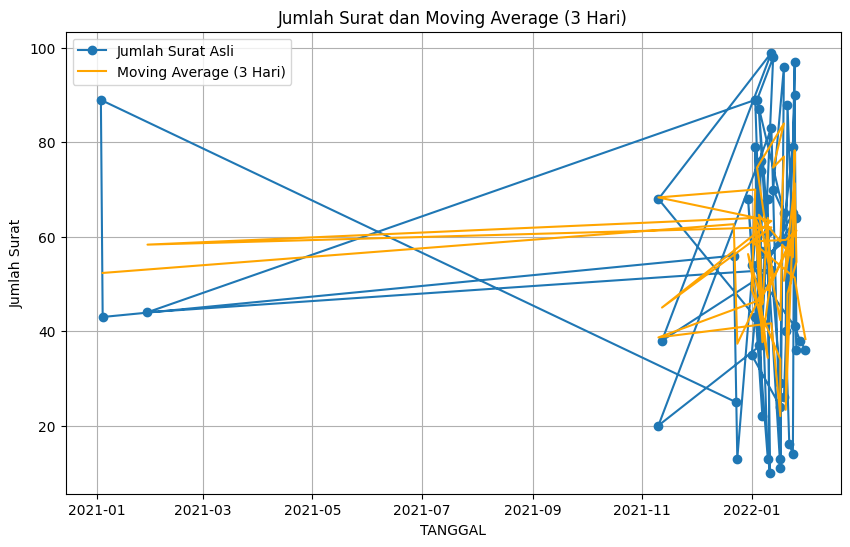

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data dari file Excel
try:
    df = pd.read_excel('Gabungan Data.xlsx')
except FileNotFoundError:
    print("File 'Gabungan Data.xlsx' tidak ditemukan. Pastikan nama file dan lokasinya benar.")
    exit()

# Cetak nama kolom untuk verifikasi
print("Kolom yang ditemukan dalam file:", df.columns)

# Normalisasi nama kolom
df.columns = df.columns.str.strip()

# Pastikan kolom 'TANGGAL' ada dan diubah menjadi format datetime
if 'TANGGAL' not in df.columns:
    print("Kolom 'TANGGAL' tidak ditemukan. Pastikan kolom ini ada.")
    exit()

df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], errors='coerce')
df.dropna(subset=['TANGGAL'], inplace=True)

# Tambahkan kolom 'Jumlah_Surat' jika belum ada
if 'Jumlah_Surat' not in df.columns:
    print("Kolom 'Jumlah_Surat' tidak ditemukan. Membuat kolom baru dengan nilai dummy...")
    # Tambahkan nilai dummy (misalnya angka acak antara 10-100)
    import numpy as np
    df['Jumlah_Surat'] = np.random.randint(10, 100, size=len(df))

# Set kolom 'TANGGAL' sebagai indeks
df.set_index('TANGGAL', inplace=True)

# Hitung Moving Average dengan window 3
df['MA_3'] = df['Jumlah_Surat'].rolling(window=3).mean()

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Jumlah_Surat'], label='Jumlah Surat Asli', marker='o')
plt.plot(df.index, df['MA_3'], label='Moving Average (3 Hari)', color='orange')
plt.title('Jumlah Surat dan Moving Average (3 Hari)')
plt.xlabel('TANGGAL')
plt.ylabel('Jumlah Surat')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(df.columns)

Index(['NO', 'KODE', 'TANGGAL', 'NOMOR DAN TANGGAL', 'SIFAT SURAT',
       'ISI RINGKAS', 'DARI', 'KEPADA', 'PENGOLAH', 'KET'],
      dtype='object')


In [5]:
print(df['TANGGAL'].unique())


[44553 44199 44200 44552 44554 44567 44566 44564 44568 44560 44571 44572
 44225 44573 '12-nov-21' '10-nov-21' 44562 '-' 44578 '10-Nov-21' 44574
 44565 44580 44579 44585 44586 44583 44581 44582 44587 44589 44592]


<Figure size 1000x800 with 0 Axes>

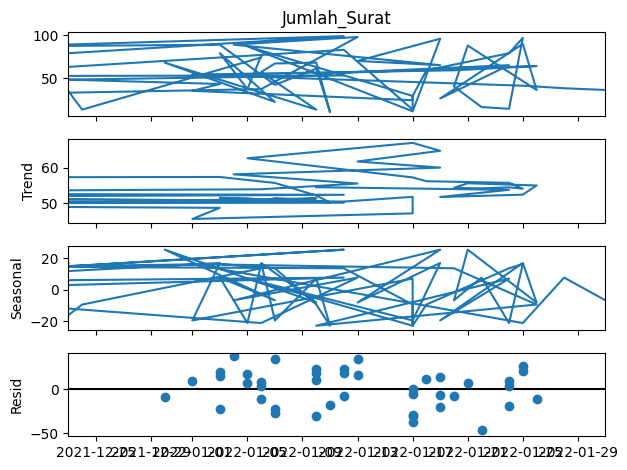

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekomposisi deret waktu menggunakan STL
decomposition = seasonal_decompose(df['Jumlah_Surat'], model='additive', period=12)  # period=12 untuk data bulanan

# Plot hasil dekomposisi
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Load data dari Excel
df = pd.read_excel('Gabungan Data.xlsx')

# Cek data awal
print("Beberapa baris pertama data:")
print(df.head())

# Menangani format TANGGAL yang tidak standar
df['NOMOR DAN TANGGAL'] = pd.to_datetime(df['NOMOR DAN TANGGAL'], errors='coerce', dayfirst=True)

# Tangani data dengan TANGGAL tidak valid
if df['NOMOR DAN TANGGAL'].isna().any():
    print("Terdapat TANGGAL yang tidak valid. Data akan dihapus:")
    print(df[df['NOMOR DAN TANGGAL'].isna()])
    df = df.dropna(subset=['NOMOR DAN TANGGAL'])

# Sortir dan set index
df = df.sort_values('NOMOR DAN TANGGAL')
df.set_index('NOMOR DAN TANGGAL', inplace=True)

# Periksa kolom 'Jumlah_Surat'
if 'Jumlah_Surat' not in df.columns:
    raise KeyError("Kolom 'Jumlah_Surat' tidak ditemukan dalam data!")

# Pastikan tidak ada nilai kosong di 'Jumlah_Surat'
df['Jumlah_Surat'] = df['Jumlah_Surat'].fillna(0)

# Membagi data
train = df['Jumlah_Surat'][:'2024-09']
test = df['Jumlah_Surat']['2024-10':]

# Membangun dan melatih model ARIMA
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Peramalan
forecast = model_fit.forecast(steps=len(test))
print("Hasil Peramalan Jumlah Surat:")
print(forecast)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Jumlah_Surat'], label='Data Asli')
plt.plot(test.index, forecast, label='Peramalan', color='red', linestyle='--')
plt.title('Hasil Peramalan dengan ARIMA')
plt.xlabel('TANGGAL')
plt.ylabel('Jumlah Surat')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Beberapa baris pertama data:
   NO  KODE    TANGGAL            NOMOR DAN TANGGAL SIFAT SURAT  \
0   1   2.0 2021-12-23                 030/6.419.20           -   
1   2  11.0 2021-01-03  0001/ADMIN/KIAS.HRGA/I/2022           -   
2   3  16.0 2021-01-04             518.3/09.15/2021           -   
3   4  17.0 2021-12-22                     560/1228           -   
4   5  21.0 2021-12-24   009/JA.Intermedia/XII/2021           -   

                                         ISI RINGKAS                  DARI  \
0                         Penertiban Adm Penghapusan        SETDA Kab. Kra   
1    Permohonan fasilitasi ruang penunjang rekrutmen              PT. KIAS   
2                                Permohonan Personil            Disparpora   
3  Permintaan petugas database kasus ketenagakerjaan  DISNAKERTRANS JATENG   
4                      Greeting HUT DPRD Karanganyar    Solopos Intermedia   

                  KEPADA  PENGOLAH  KET  
0  Kepala Disdagnakerkop      Umum  NaN  
1  Kepala Disda

C:\Users\aisyah\AppData\Local\Temp\ipykernel_13588\2883893349.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['NOMOR DAN TANGGAL'] = pd.to_datetime(df['NOMOR DAN TANGGAL'], errors='coerce', dayfirst=True)


KeyError: "Kolom 'Jumlah_Surat' tidak ditemukan dalam data!"

In [13]:
print(df['NOMOR DAN TANGGAL'].head())

0                   030/6.419.20
1    0001/ADMIN/KIAS.HRGA/I/2022
2               518.3/09.15/2021
3                       560/1228
4     009/JA.Intermedia/XII/2021
Name: NOMOR DAN TANGGAL, dtype: object
